# Non Linear Relationships

In [45]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
y = boston_data.target

<hr><br>
# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
X = df[['LSTAT']].values

In [50]:
tree = DecisionTreeRegressor(max_depth=5)

In [51]:
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [54]:
str_idx = X.flatten().argsort()

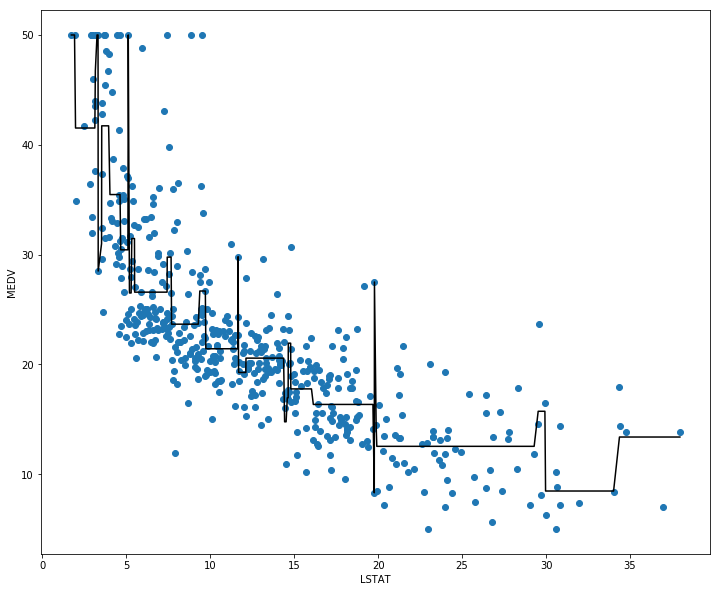

In [57]:
plt.figure(figsize=(12, 10))
plt.scatter(X[str_idx], y[str_idx])
plt.plot(X[str_idx], tree.predict(X[str_idx]), color = 'k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

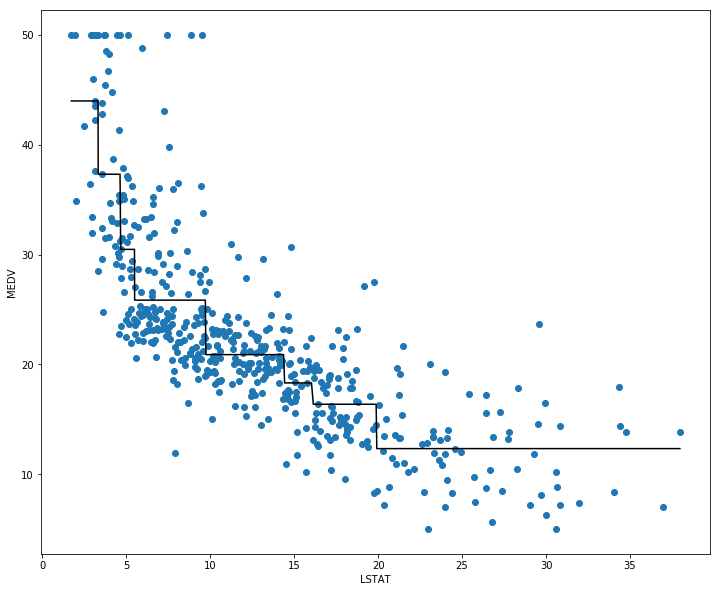

In [63]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
str_idx = X.flatten().argsort()
plt.figure(figsize=(12, 10))
plt.scatter(X[str_idx], y[str_idx])
plt.plot(X[str_idx], tree.predict(X[str_idx]), color = 'k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

# Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [78]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=42, n_jobs=-1)

In [79]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [80]:
y_train_pred = forest.predict(X_train)

In [81]:
y_test_pred = forest.predict(X_test)

In [82]:
print(mean_squared_error(y_train, y_train_pred),', ', mean_squared_error(y_test, y_test_pred))

8.0391785365 ,  31.3567380699


In [83]:
print(r2_score(y_train, y_train_pred),', ', r2_score(y_test, y_test_pred))

0.907460992872 ,  0.572410740064


<hr><br>
# AdaBoost 

In [84]:
from sklearn.ensemble import AdaBoostRegressor

In [86]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=500, random_state=42)

In [88]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=500,
         random_state=42)

In [89]:
y_train_pred = ada.predict(X_train)

In [90]:
y_test_pred = ada.predict(X_test)

In [91]:
print(mean_squared_error(y_train, y_train_pred),', ',mean_squared_error(y_test, y_test_pred))

23.6579030064 ,  25.6397429806


In [92]:
print(r2_score(y_train, y_train_pred),', ',r2_score(y_test, y_test_pred))

0.727673810825 ,  0.65036928581
